In [2]:
#Load Libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import graphviz
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [3]:
#reading the data 
in_file = 'train.csv'
df = pd.read_csv(in_file, sep = ',',engine='python')

In [4]:
#check data dimensions
print("The data has {0} rows and {1} columns".format(df.shape[0], df.shape[1]))
print("----------------------------------------------")

The data has 891 rows and 12 columns
----------------------------------------------


In [5]:
#first five rows of the data
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#checking observation count and data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#checking missing values in the data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#checking Embarked data distribution count 
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
#filling null values in Age column with python fillna 
cols = ['Age']
df[cols] = df[cols].fillna(np.mean(df[cols]))
df.Embarked.fillna(value = 'S', axis = 0, inplace = True)

In [10]:
# dropping cabin column as it has many missing values 
df.drop(['Cabin'],axis = 1,inplace=True)

In [11]:
#Summary of Data
numerical = [
  'Age', 'Fare',
]
categorical = [
  'Survived', 'Name','Pclass', 'Sex', 'SibSp', 'Parch',  'Embarked','Ticket'
]

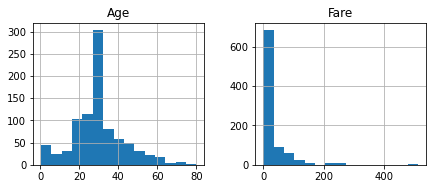

In [12]:
#Analyzing Numerical Variables
df[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));


In [27]:
#Printing value count for survived
df['Survived'].value_counts().to_frame()

,Survived
0,549
1,342


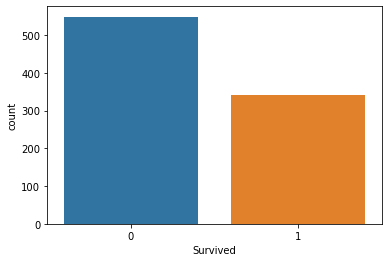

In [28]:
#Analyzing Categorical Variables
sns.countplot(df['Survived'])

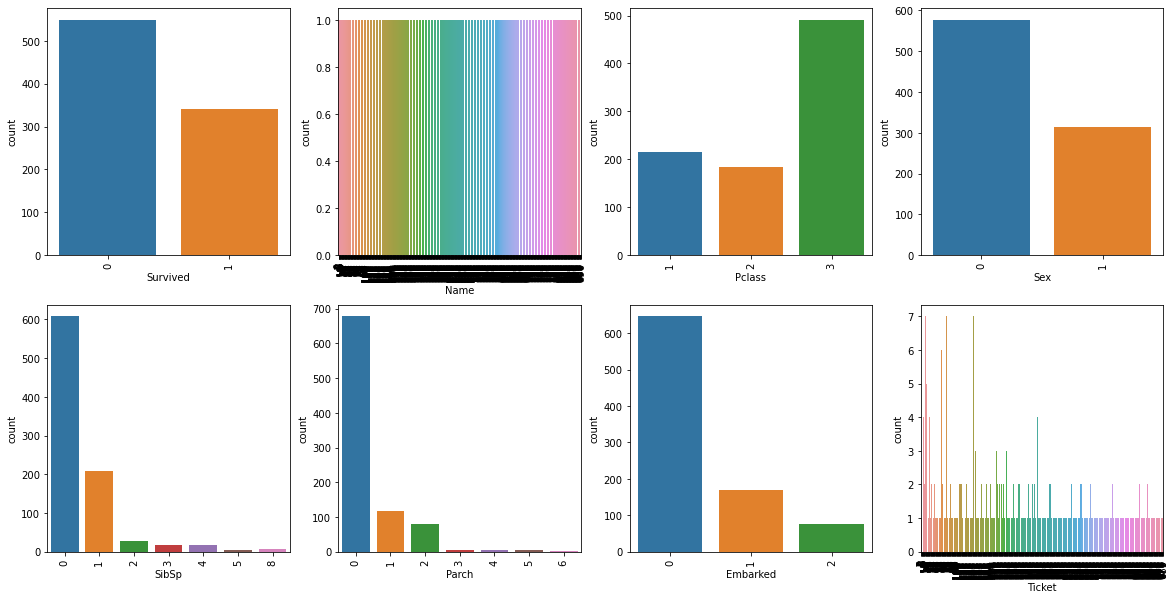

In [31]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [30]:
# converting categorical values to factors with python factorize 
df['Name'],_ = pd.factorize(df['Name'])
df['Sex'],_ = pd.factorize(df['Sex'])
df['Ticket'],_ = pd.factorize(df['Ticket'])
df['Embarked'],_ = pd.factorize(df['Embarked'])

In [33]:
#Check Data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name             int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket           int64
Fare           float64
Embarked         int64
dtype: object

In [16]:
#split dataset in features and target variable
feature_cols = ['Age', 'Fare','Pclass','SibSp','Parch','Embarked','Sex']
X = df[feature_cols] # Features
y = df.Survived # Target variable


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [40]:
#importing train_test_split to create test set 
from sklearn.model_selection import train_test_split 

#creating train and test  set 
#X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state = 100, stratify = y, test_size = 0.30)# 70% training and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, stratify = y, random_state=123) # 75% Training and 25% test

#shape of validation set 
X_test.shape, y_test.shape

#shape of training set 
X_train.shape, y_train.shape

((668, 7), (668,))

In [50]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier 

#creating the Decision Tree function 
clf_dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_dt=clf.fit(X_train, y_train)


In [51]:
#checking the training score 
y_pred = clf_dt.predict(X_test)

y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [64]:
# Model Accuracy, how often is the classifier correct?

print("Accuracy:",metrics.accuracy_score(y_test, y_pred) *100, "%")

Accuracy: 80.71748878923766 %


In [63]:
#Create, train and evaluate gini 
clf_dt = DecisionTreeClassifier(criterion = "gini",max_depth=3 ,max_leaf_nodes=25,random_state=10)

#fitting the model 
clf_dt.fit(X_train, y_train)

# Model Accuracy, how often is the classifier correct?
print("Accuracy Max Depth 3:",metrics.accuracy_score(y_test, y_pred) * 100, "%")

Accuracy Max Depth 3: 80.71748878923766 %


In [55]:
from sklearn.model_selection import cross_val_score

# Model performance
scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores))) 


CV accuracy: 0.820 +/- 0.036


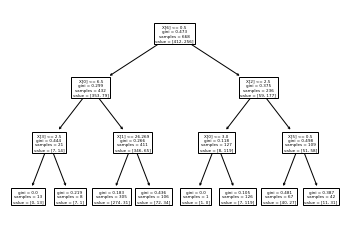

In [56]:
#Plotting Decision tree using scikit-learn’s tree.plot_tree
tree.plot_tree(clf_dt);

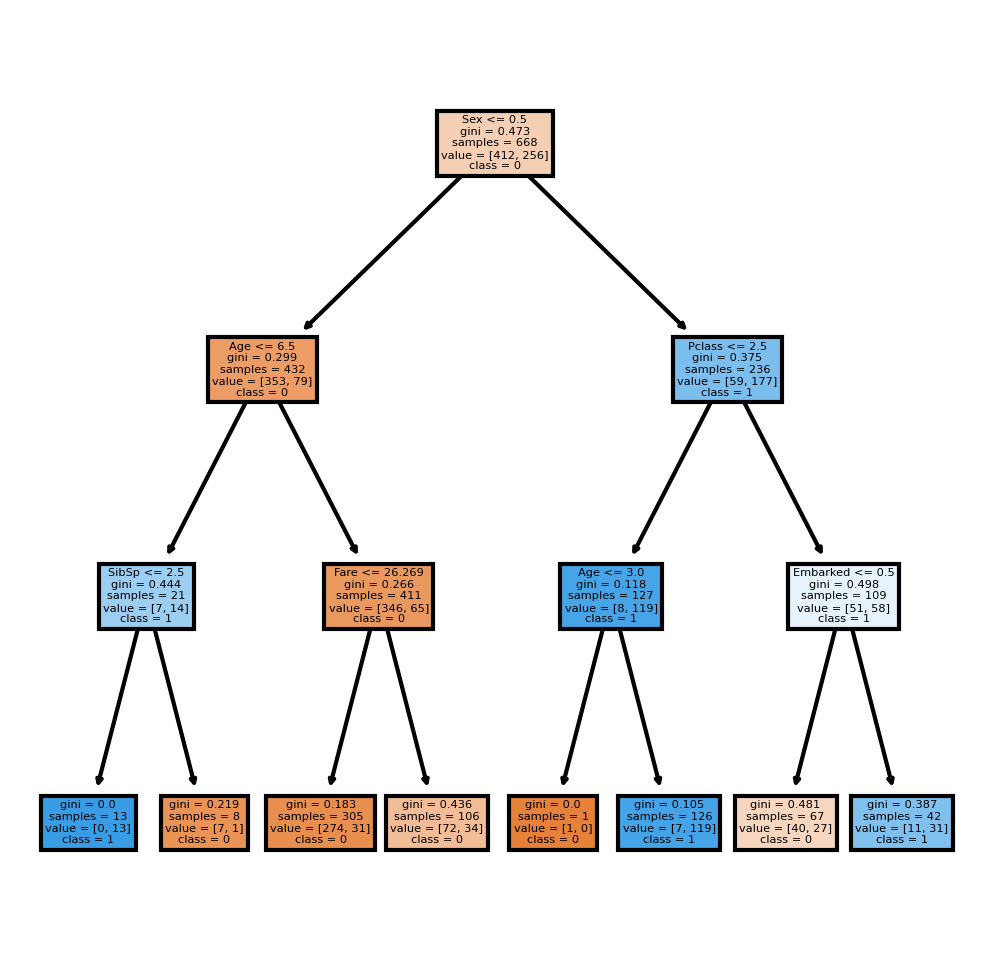

In [58]:
fn=feature_names = feature_cols
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf_dt,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

In [65]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_rf=RandomForestClassifier(n_estimators=50)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [67]:
# Create Decision Tree classifer object
y_pred=clf_rf.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [69]:
#Printing Results 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)*100
print("Accuracy:",result2, "%")

Confusion Matrix:
[[115  22]
 [ 24  62]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       137
           1       0.74      0.72      0.73        86

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223

Accuracy: 79.37219730941703 %
